+ This notebook is part of lecture 1 *The geometry of linear equations* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Head of Acute Care Surgery
    + Groote Schuur Hospital
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

+ In this series of notebooks I will make use of a custom cascading style sheet
+ The file *style.css* must be in the same folder as the notebook file
+ The first block of code executes the stylesheet

In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

+ All the modules and function will be imported here

In [2]:
import numpy as np # Using namespace abbreviation to import numerical python
from sympy import init_printing, symbols, Matrix, Eq # Imporint only the
# required functions in the sympy module
import matplotlib.pyplot as plt # Using namespace abbreviation to import
# the pyplot submodule of matplotlib
import seaborn as sns # Using namespace abbreviation to import
# the seaborn plotting library
from IPython.display import Image
from warnings import filterwarnings

init_printing(use_latex = 'mathjax') # Used to print Latex to the screen
%matplotlib inline
filterwarnings('ignore') # Ignore those ugly pink warning boxes

In [3]:
# Comments will be in this form
# Comments are not executed

In [4]:
x, y, z = symbols('x y z') # Creating symbolic mathematical variables as opposed to computer variables
# These symbols can no longer be used as computer variable names

# Geometrical view

## System of linear equations

* A set of variables (each of power one and not transcendental)
* Example
$$ 2{x}-{y}={0} $$
$$ -{x} + 2{y} = {3} $$

* This can be represented as an augmented matrix

In [5]:
A_augm = Matrix([[2, -1, 0], [-1, 2, 3]]) # Note the placement of ()'s and []'s
A_augm # A_augm is a computer variable that contains the matrix

⎡2   -1  0⎤
⎢         ⎥
⎣-1  2   3⎦

In [6]:
# We can ask python what type of computer variable A_augm holds
type(A_augm)  # We see that it is a mutable dense matrix

sympy.matrices.dense.MutableDenseMatrix

* The matrix of coefficients:

In [7]:
A = Matrix([[2, -1], [-1, 2]])
A

⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦

* The variable vector:

In [8]:
x_vect = Matrix([x, y])
x_vect

⎡x⎤
⎢ ⎥
⎣y⎦

* The solution vector:

In [9]:
b_vect = Matrix([0, 3])
b_vect

⎡0⎤
⎢ ⎥
⎣3⎦

In [10]:
Eq(A * x_vect, b_vect) # From Ax = b
# The Eq function takes the arguments left-hand-side (LHS), right-handside (RHS) of the equation

⎡2⋅x - y ⎤ = ⎡0⎤
⎢        ⎥   ⎢ ⎥
⎣-x + 2⋅y⎦   ⎣3⎦

## The row picture

<function matplotlib.pyplot.show>

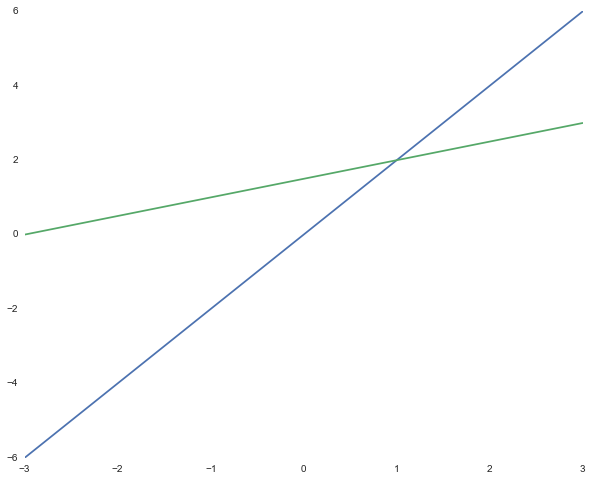

In [11]:
# Don't be too concerned about the code for plotting
# It does not form part of this series of notebooks

x_vals = np.linspace(-3, 3, 100) # Create 100 values between -3 and 3
# Note that we cannot use the computer variable x, because it has been reserved above as a mathematical variable in
# the symbols function

plt.figure(figsize = (10,8)) # Create a graph of size 10 by 8
plt.plot(x_vals, 2 * x_vals) # Plot every single value created above with 2 times that values
# Taken from the first equation which was y = 2x or f(x) = 2x
# The plot takes the arguments (code between parentheses) of x,y
plt.plot(x_vals, ((x_vals / 2) + (3 / 2))) # Also plot the second equation
plt.show; # Draw the plot on screen

## The column picture

* In the column picture we look at the column vector associate with the variables:
$$ x\begin{bmatrix} 2 \\ -1 \end{bmatrix}+y\begin{bmatrix} -1 \\ 2 \end{bmatrix}=\begin{bmatrix} 0 \\ 3 \end{bmatrix} $$
* It asks us to look at the linear combination of the columns

* Performing this multiplication results in the same equation

In [12]:
Eq(x * Matrix([2, -1]) + y * Matrix([-1, 2]), Matrix([0, 3]))

⎡2⋅x - y ⎤ = ⎡0⎤
⎢        ⎥   ⎢ ⎥
⎣-x + 2⋅y⎦   ⎣3⎦

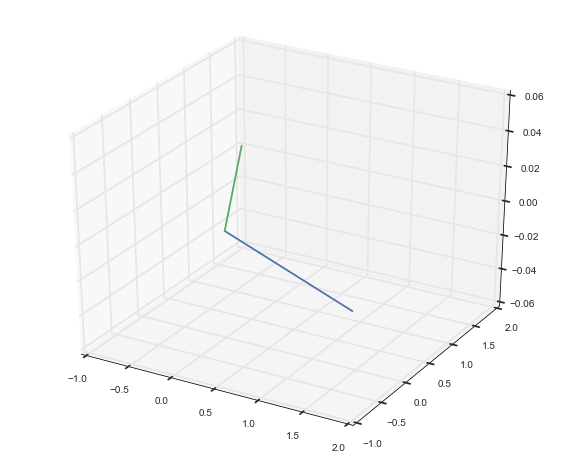

In [13]:
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, 2], [0, -1],zs=[0, 0])
# The three sets of square bracket contain as first element the starting
# point, i.e. 0, 0, 0 (as in  x, y ,z coordinates)
# The second element in each square bracket represents the end-point, i.e. 2, -1, 0 
ax.plot([0, -1], [0, 2],zs=[0, 0])

plt.show();

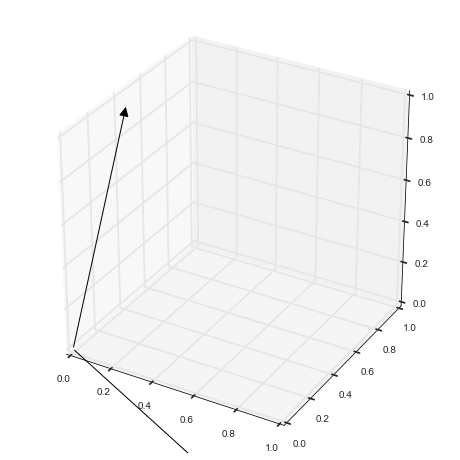

In [14]:
# Method adding arrow heads (very complicated)
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 2],[0, -1],[0, 0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
b = Arrow3D([0, -1],[0, 2],[0, 0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
ax.add_artist(b)
plt.show()

* The column view suggest that we need one of the first vector to be added to two times the second vector to get to point (0,3)

* Note that we are working in the *xy*-plane
* Forgetting for now the solution (0,3), if we took all the possible values (on the real line) for *x* and *y*, we would fill the whole plane
* Linear combinations of the two (column) vectors...
$$ \begin{bmatrix} 2 \\ -1 \end{bmatrix} $$
* ...and...
$$ \begin{bmatrix} -1 \\ 2 \end{bmatrix} $$
* ...fill &#8477;<sup>2</sup>

* It's easy to see that these two vectors are not linear combinations of each other (they don't lie on the same line)
* If this is so (they are linearly independent) and linear combinations of them fill the plane we say they span the plane (&#8477;<sup>2</sup>)

* It's also easy to imagine that the *xy*-plane is filled with (all the points are filled with) vectors, i.e. I can find any coordinate by drawing a vector to it
* All these vectors together can be called a **set**
* Let's call this set *W* and is equals &#8477;<sup>2</sup>
* Later we will see that this vector space is a subspace of *V* = &#8477;<sup>3</sup>
* We will also see that the vectors above span *W*, i.e. *W* = span(set of two vectors above)
* It will also be shown that this set of two vectors is a **basis** of *W* (they are linearly independent and they span *W*)
* &#8477;<sup>2</sup> is of **dimension** two (2) as the whole space can be represented by a linear combination of just two vectors
    * The basis vectors for &#8477;<sup>2</sup> are actually...
$$ \begin{bmatrix} 1 \\ 0 \end{bmatrix},\begin{bmatrix} 0 \\ 1 \end{bmatrix} $$
    * ...which we commonly call 
$$ \hat { i } ,\hat { j }  $$

## The 3-space picture

$$ {3x}+{2y}-{z}=2 $$
$$ {x}-{2y}-{z}=3 $$
$$ {2x}+{y}-{z}={1} $$

In [15]:
A_augm = Matrix([[3, 2, -1, 2], [1, -2, -1, 3], [2, 1, -1, 1]])
A_augm

⎡3  2   -1  2⎤
⎢            ⎥
⎢1  -2  -1  3⎥
⎢            ⎥
⎣2  1   -1  1⎦

In [16]:
A_augm.rref()

⎛⎡1  0  0  5/2 ⎤, [0, 1, 2]⎞
⎜⎢             ⎥           ⎟
⎜⎢0  1  0  -3/2⎥           ⎟
⎜⎢             ⎥           ⎟
⎝⎣0  0  1  5/2 ⎦           ⎠

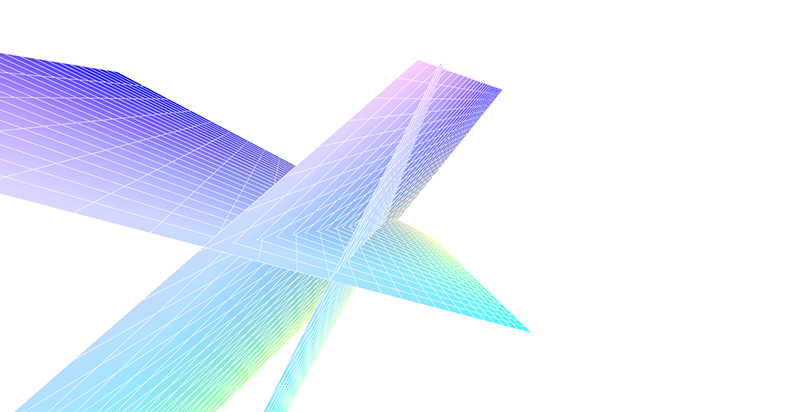

In [17]:
Image(filename = '3d.png')